In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_pdf_normal(mu, sigma):
    # Mean and standard deviation

    # Generating points on the x axis between -4 and 4, which is typical for a normal distribution plot
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

    # Calculating the probability density function for the normal distribution
    pdf = (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-0.5 * ((x - mu) ** 2) / (sigma ** 2))
    return pd.DataFrame({'X':x,'PDF':pdf})

def draw_underlying_distribution(pdf,mu=None,sigma=None,title=''):
    plt.figure(figsize=(10, 5))
    if mu:
        title_text = f" | Mean={mu} kg, SD={sigma} kg"
    else:
        title_text = ''
    
    plt.title(f'{title}{title_text}')
    sns.lineplot(data=pdf, x="X", y='PDF')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Probability Density')
    if mu:
        plt.axvline(mu, color='k', linestyle='dashed', linewidth=2)
    return plt

# Step 2: Function to extract a sample of n weights from the distribution
def sample_weights(mu, sigma, n):
    return np.random.normal(mu, sigma, n)

# Step 3: Function to plot the mean of the sample onto the previous plot
def plot_sample_mean(mu, sigma, n, plt):
    sample = sample_weights(mu, sigma, n)
    sample_mean = np.mean(sample)
    plt.scatter(sample_mean,0, color='r')
    #plt.legend()
    
    return plt

def simulate_random_draws_from_normal(mu,sigma,n_samples,sample_size):
    pdf = get_pdf_normal(mu, sigma)
    plot = draw_underlying_distribution(pdf,mu,sigma)

    for i in range(n_samples):
        plt = plot_sample_mean(mu, sigma, sample_size, plot)
    plt.show()


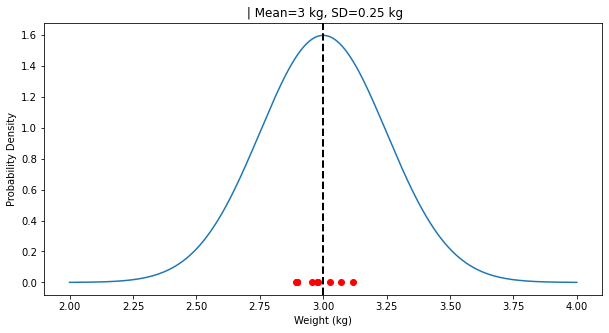

In [157]:
simulate_random_draws_from_normal(3,0.25,10,5)

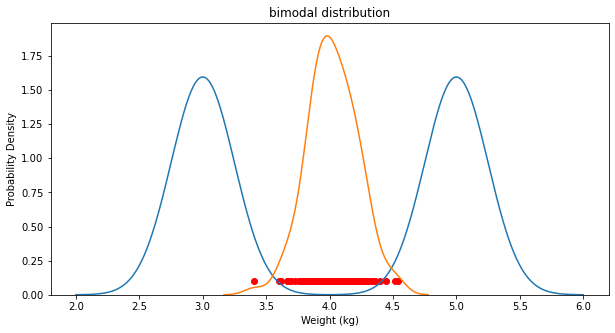

In [10]:
pdf_1 = get_pdf_normal(3, 0.25)
pdf_2 = get_pdf_normal(5, 0.25)
pdf_bimodal = pd.concat([pdf_1 , pdf_2])

draw_underlying_distribution(pdf_bimodal.reset_index(),'','',title='bimodal distribution')

smeans = []
for i in range(100):
    sample_mean = pdf_bimodal.sample(30)['X'].mean()
    smeans.append(sample_mean)
    plt.scatter(sample_mean,.1, color='r')
sns.kdeplot(x=smeans)    
plt.show()

In [43]:
def get_pdf_uniform(a, b):
    # a and b define the interval [a, b]
    x = np.linspace(a, b, 1000)
    pdf = np.full_like(x, 1 / (b - a))
    return pd.DataFrame({'X': x, 'PDF': pdf})

def get_pdf_exponential(lamb):
    # lamb is the rate parameter, often denoted as lambda in literature
    x = np.linspace(0, 10 / lamb, 1000)
    pdf = lamb * np.exp(-lamb * x)
    return pd.DataFrame({'X': x, 'PDF': pdf})

def get_pdf_beta(alpha, beta):
    from scipy.stats import beta as sp_beta
    x = np.linspace(0, 1, 1000)
    pdf = sp_beta.pdf(x, alpha, beta)
    return pd.DataFrame({'X': x, 'PDF': pdf})

def get_pdf_log_normal(mu, sigma):
    from scipy.stats import lognorm
    x = np.linspace(0, np.exp(mu + 4*sigma), 1000)
    pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))
    return pd.DataFrame({'X': x, 'PDF': pdf})

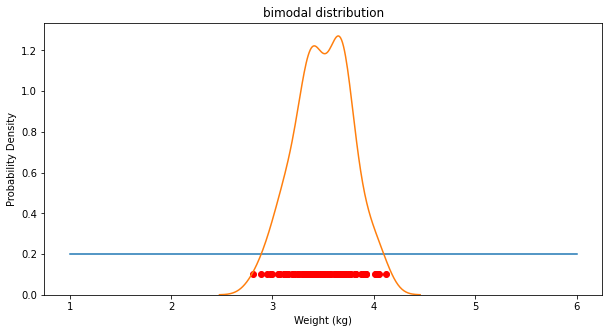

In [22]:
pdf = get_pdf_uniform(1, 6)
draw_underlying_distribution(pdf.reset_index(),'','',title='uniform distribution')
smeans = []
for i in range(100):
    sample_mean = pdf.sample(30)['X'].mean()
    smeans.append(sample_mean)
    plt.scatter(sample_mean,.1, color='r')
sns.kdeplot(x=smeans)    
plt.show()

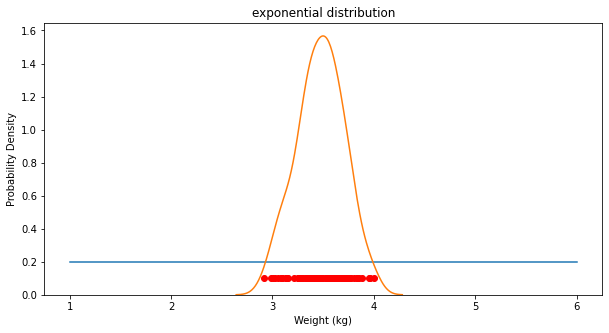

In [38]:
pdf = get_pdf_uniform(1,6)
draw_underlying_distribution(pdf.reset_index(),'','',title='exponential distribution')
smeans = []
for i in range(100):
    sample_mean = pdf.sample(30)['X'].mean()
    smeans.append(sample_mean)
    plt.scatter(sample_mean,.1, color='r')
sns.kdeplot(x=smeans)    
plt.show()

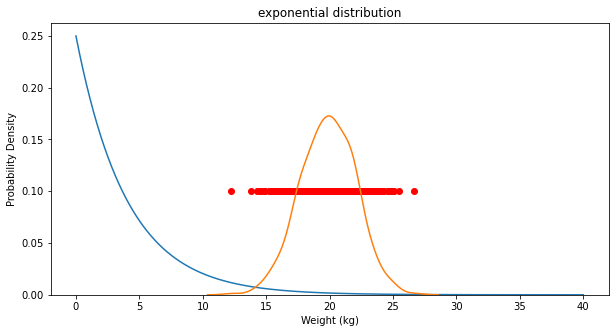

In [34]:
pdf = get_pdf_exponential(0.25)
draw_underlying_distribution(pdf.reset_index(),'','',title='exponential distribution')
smeans = []
for i in range(500):
    sample_mean = pdf.sample(30)['X'].mean()
    smeans.append(sample_mean)
    plt.scatter(sample_mean,.1, color='r')
sns.kdeplot(x=smeans)    
plt.show()

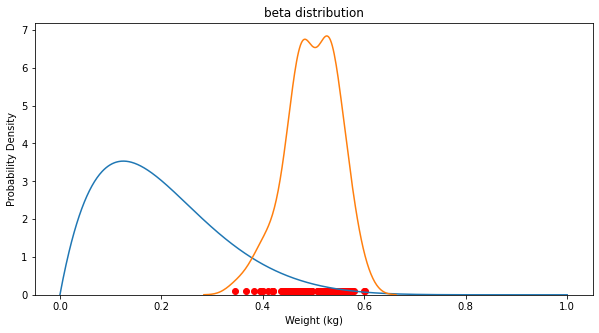

In [45]:
pdf = get_pdf_beta(2,8)
draw_underlying_distribution(pdf.reset_index(),'','',title='beta distribution')
smeans = []
for i in range(100):
    sample_mean = pdf.sample(30)['X'].mean()
    smeans.append(sample_mean)
    plt.scatter(sample_mean,.1, color='r')
sns.kdeplot(x=smeans)    
plt.show()

<AxesSubplot:xlabel='X', ylabel='PDF'>

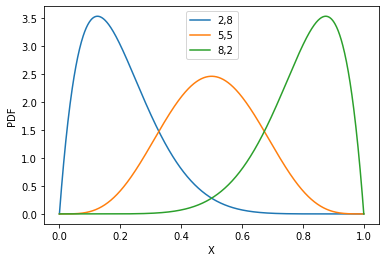

In [42]:
sns.lineplot(data=get_pdf_beta(2,8),x='X',y='PDF',label=('2,8'))
sns.lineplot(data=get_pdf_beta(5,5),x='X',y='PDF',label=('5,5'))
sns.lineplot(data=get_pdf_beta(8,2),x='X',y='PDF',label=('8,2'))

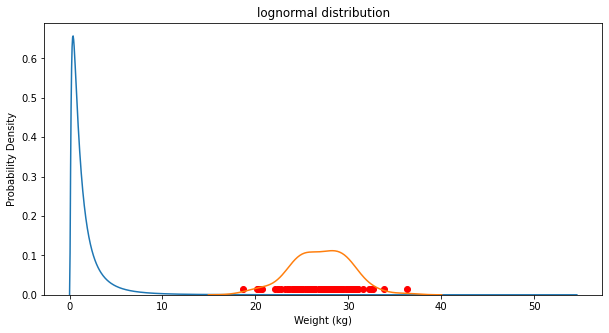

In [54]:
pdf = get_pdf_log_normal(0,1)
draw_underlying_distribution(pdf.reset_index(),'','',title='lognormal distribution')
smeans = []
for i in range(100):
    sample_mean = pdf.sample(30)['X'].mean()
    smeans.append(sample_mean)
    plt.scatter(sample_mean,0.015, color='r')
sns.kdeplot(x=smeans)    
plt.show()

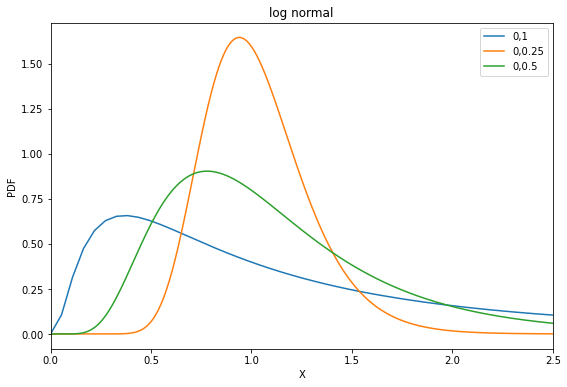

In [52]:
plt.figure(figsize=(9,6))
plt.title('log normal')
sns.lineplot(data=get_pdf_log_normal(0,1),x='X',y='PDF',label=('0,1'))
sns.lineplot(data=get_pdf_log_normal(0,0.25),x='X',y='PDF',label=('0,0.25'))
sns.lineplot(data=get_pdf_log_normal(0,0.5),x='X',y='PDF',label=('0,0.5'))
plt.xlim(0,2.5)
plt.show()

In [2]:
import random

def roll_die():
    """Return a random integer between 1 and 6, simulating a die roll."""
    return random.randint(1, 6)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}

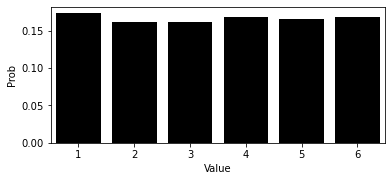

In [147]:
counter = {i:0 for i in range(1,7)}
for i in range(5000):
    counter[roll_die()] += 1

data = pd.DataFrame.from_dict(counter,orient='index').reset_index()
data['index'] = data['index'].astype(str)
data['prob'] = data[0]/data[0].sum()

plt.figure(figsize=(6,2.5))
sns.barplot(data=data,x='index',y='prob',color='black')
plt.ylabel('Prob')
plt.xlabel('Value')
plt.show()

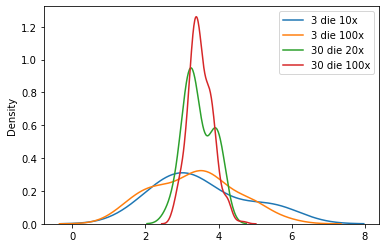

In [148]:
sns.kdeplot([np.mean([roll_die() for i in range(3)]) for i in range(10)], label=('3 die 10x'))
sns.kdeplot([np.mean([roll_die() for i in range(3)]) for i in range(100)], label=('3 die 100x'))
sns.kdeplot([np.mean([roll_die() for i in range(30)]) for i in range(20)], label=('30 die 20x'))
sns.kdeplot([np.mean([roll_die() for i in range(30)]) for i in range(500)], label=('30 die 100x'))
plt.legend()

In [1]:
import numpy as np
import seaborn as sns

<AxesSubplot:ylabel='Density'>

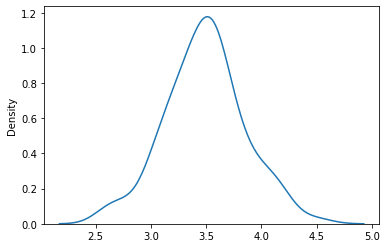

In [23]:
sns.kdeplot([np.mean([roll_die() for i in range(30)]) for i in range(100)], label=('30 die 20x'))